In [2]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

In [3]:
import pickle
filename = 'C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\raw-img\\datasetHSV.pkl'
df = pickle.load(open(filename, 'rb'))

In [4]:
working_df = df.copy()
working_df = working_df[np.isin(working_df['label'], ['cat', 'dog'])]
print(working_df['label'].value_counts())

dog    4863
cat    1668
Name: label, dtype: int64


In [5]:
print(working_df.columns)

Index(['label', 'img_hsv'], dtype='object')


In [6]:
size=80
working_df['img_hsv'] = working_df['img_hsv'].apply(lambda x: cv2.resize(x, (size, size)))
print(working_df['img_hsv'].apply(lambda x: x.shape).unique().shape)

(1,)


In [7]:
#hsv to gray
working_df['img_hsv'] = working_df['img_hsv'].apply(lambda x: cv2.cvtColor(x, cv2.COLOR_HSV2RGB))
working_df['img_hsv'] = working_df['img_hsv'].apply(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2GRAY))

In [8]:
#img to array
print(working_df['img_hsv'].shape)
print(working_df['img_hsv'].iloc[0].shape)
print(type(working_df['img_hsv']))
print(type(working_df['img_hsv'].iloc[0]))
working_df['img_hsv'] = working_df['img_hsv'].apply(lambda x: x.reshape(-1))
X = working_df['img_hsv'].values
X = np.stack(X)

(6531,)
(80, 80)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [10]:
#transforme le texte des labels en chiffres
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
working_df['label'] = le.fit_transform(working_df['label']) # 0 cat, 1 dog
print(working_df['label'].value_counts())

1    4863
0    1668
Name: label, dtype: int64


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, working_df['label'], test_size=0.2)


In [ ]:
pickle.dump(X_test, open('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\raw-img\\X_test.pkl', 'wb'))
pickle.dump(y_test, open('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\raw-img\\y_test.pkl', 'wb'))

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(type(X_train))

(5224, 6400)
(5224,)
<class 'numpy.ndarray'>


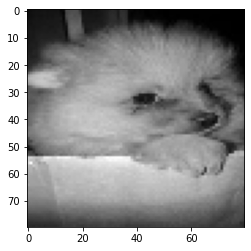

In [ ]:
#impression image 
hsv = working_df['img_hsv'].iloc[2900].reshape(size,size)
plt.imshow(hsv, cmap='gray')

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(3000, 1000, 100), max_iter=1000, verbose=True)
clf.fit(X_train, y_train)

Iteration 1, loss = 14.14920908
Iteration 2, loss = 13.92648154
Iteration 3, loss = 11.16278483
Iteration 4, loss = 7.31366182
Iteration 5, loss = 4.00457442
Iteration 6, loss = 3.60430199
Iteration 7, loss = 4.58947126
Iteration 8, loss = 3.64187262
Iteration 9, loss = 3.13047613
Iteration 10, loss = 2.47352054
Iteration 11, loss = 0.91526026
Iteration 12, loss = 0.75184827
Iteration 13, loss = 0.87311387
Iteration 14, loss = 1.00745694
Iteration 15, loss = 0.63383501
Iteration 16, loss = 0.57852876
Iteration 17, loss = 0.55150095
Iteration 18, loss = 0.57521660
Iteration 19, loss = 0.53468103
Iteration 20, loss = 0.64325264
Iteration 21, loss = 0.64334151
Iteration 22, loss = 0.54115978
Iteration 23, loss = 0.56279605
Iteration 24, loss = 0.53500237
Iteration 25, loss = 0.51454925
Iteration 26, loss = 0.49722417
Iteration 27, loss = 0.49556279
Iteration 28, loss = 0.48859190
Iteration 29, loss = 0.49278959
Iteration 30, loss = 0.48346498
Iteration 31, loss = 0.46694210
Iteration 32, 

MLPClassifier(hidden_layer_sizes=(3000, 1000, 100), max_iter=1000, verbose=True)

In [ ]:
pickle.dump(clf, open('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\raw-img\\MLPC.pkl', 'wb'))

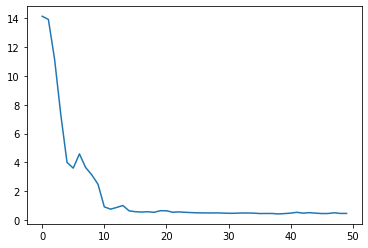

In [ ]:
plt.plot(clf.loss_curve_)